## In this project, I will analyze NYC Subway data using Pandas and NumPy (entry and exit, as well as weather info at different times of day)  - some code here is adapted from the Udacity Course Intro to Data Analysis.

Some questions I can ask are:  
1) Does rain increase or decrease number of entries and exits into station?  
2) What are the peak times for each station? Is this consistent across stations?  
3) How many people travel on weekdays vs weekends?  
4) Does temperature have a significant effect on travel on weekends? How about weekdays?  
5) What days of the week involve the most travel in a particular station? Is this consistent across stations?  
6) What are the ridership patterns across time? (Udacity)       
7) Which stations have the most riders? (Udacity)    
8) Is temperature rising throughout the month? (Udacity)   
9) How does weather affect ridership? (Udacity)   
10) How does weather vary across the city? (Udacity)   

Udacity visualization suggestions:  
a) Histograms of subway ridership on both days with rain and days without rain  
b) A scatterplot of subway stations with latitude and longitude as the x and y axes and ridership as the bubble size  
c) A scatterplot with subway ridership on one axis and precipitation or temperature on the other   


## First, import the data

In [3]:
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
nyc_data = pd.read_csv('nyc_subway_weather.csv', index_col='UNIT')
#print(nyc_data.head()) #prints 1st 5 lines
#nyc_data.describe()

In [4]:
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt
#nyc_data.head()
#nyc_data.groupby('hour').mean()['day_week'].plot()

Populating the interactive namespace from numpy and matplotlib


### Let's ignore weather for now and just focus on stations  
Let's display all the stations in the data along with their latitudes and longitudes

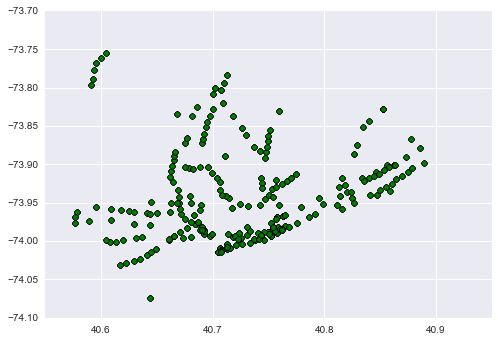

In [5]:
plt.scatter(nyc_data.latitude.values, nyc_data.longitude.values, s=25, c ='g', alpha=0.1)

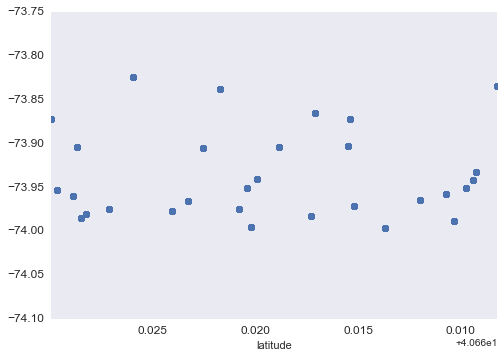

In [6]:
#nyc_data.plot(x='latitude', y='longitude', style = 'o')
nyc_data.plot(x='latitude', y='longitude', style = 'o', grid = 'off', fontsize= 12,legend=False)


In [7]:
print(len(nyc_data.latitude.unique()))
len(nyc_data.longitude.unique())

233


234

In [8]:
nyc_data.longitude.unique()

array([-73.872564, -73.867135, -73.860151, -73.851568, -73.844326,
       -73.836354, -73.828382, -73.989787, -73.993456, -73.969102,
       -73.891361, -73.783815, -73.981311, -73.984573, -73.987899,
       -73.807933, -73.80111 , -74.009056, -74.009807, -74.009335,
       -73.991096, -73.986504, -73.958395, -73.940091, -73.925575,
       -73.918719, -73.915329, -73.909879, -73.904858, -74.014099,
       -74.011867, -74.003917, -73.976945, -73.97187 , -73.967686,
       -73.878851, -73.917754, -73.981966, -73.830056, -73.980453,
       -73.977417, -73.975132, -73.971012, -73.96436 , -73.950455,
       -73.932967, -73.922668, -73.916316, -73.908763, -73.902454,
       -73.894258, -73.889451, -73.884087, -74.073622, -73.980646,
       -73.984112, -73.988682, -73.989315, -73.981891, -73.992705,
       -73.997684, -74.007232, -73.985935, -73.93271 , -73.929373,
       -73.925382, -73.921423, -73.917614, -73.912067, -73.883786,
       -73.869452, -73.962836, -73.981848, -73.88958 , -73.944

There are 234 unique stations


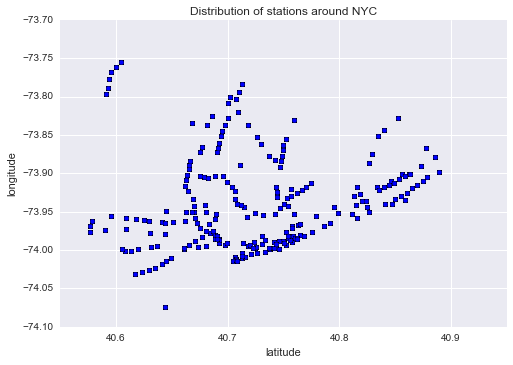

In [11]:
print("There are %s unique stations") %len(nyc_data.groupby(['latitude', 'longitude']).size())
plt.scatter(nyc_data.latitude.values, nyc_data.longitude.values, alpha = 0.5)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Distribution of stations around NYC')
plt.show()

In [12]:
#m = Basemap(projection='robin',lon_0=-73,resolution='c')
m = Basemap(llcrnrlon=nyc_data.longitude.values.min()-0.01,llcrnrlat=nyc_data.latitude.values.min()-0.01,urcrnrlon=nyc_data.longitude.values.max()+0.01,urcrnrlat=nyc_data.latitude.values.max()+0.01,
            resolution='i',projection='tmerc',lon_0=-73.8,lat_0=40.7)
#set a background colour
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral',lake_color='aqua')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawcountries(color='#6D5F47', linewidth=.4)
lats = []
lngs = []
for x,y in nyc_data.groupby(['latitude', 'longitude']).groups.keys():
    lats.append(x)
    lngs.append(y)
#print(lats)
#print(lngs)
x,y = m(lngs,lats)
#print(x)
#print(y)
#for i in range(len(nycdata.latitude.values)):
    #m.plot(nycdata.latitude.values[i],nycdata.longitude.values[i],marker='o',color='Red')
#plt.show()
m.scatter(x, y, s=10, c='blue', marker='o', alpha=0.25)

NameError: name 'Basemap' is not defined

In [ ]:
m = Basemap(llcrnrlon=nycdata.longitude.values.min()-0.1,llcrnrlat=nycdata.latitude.values.min()-0.1,urcrnrlon=nycdata.longitude.values.max()+0.1,urcrnrlat=nycdata.latitude.values.max()+0.1,
            resolution='l',projection='gall',area_thresh = 100000.0)
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral')
m.drawcoastlines()
m.drawcountries()
x, y = m(nycdata.latitude.values, nycdata.longitude.values)
m.plot(x, y, 'o', color='Indigo',markersize=4)
plt.show()